# Sunlight Foundation | LGBTQ Trend Report

1. [URL set](#section_1)
2. [Content Analysis](#section_2)
  1. Defining terms
  2. Getting counts
  3. Analyzing results
3. [Sentiment Analysis](#section_3)
4. [Case study: HUD](#section_4)


In [21]:
import scripts.sentiment_analysis as ta
import scripts.get_content as gc
import scripts.analysis as a
import pandas as pd
import numpy as np
import nltk
import csv
import os

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<a id='section_1'></a>
## 1. Constructing URL set

We got the URLs that result from searches on usa.gov's search engine on a list of terms (term_search). Then, we combined them with some previosuly wip-identified urls and then performed a visual inspection to remove any urls that our code was not able to capture (13 urls out of 295 urls). The final output from this inspection for the next section of this analysis is named links_final.csv (in the inputs folder).

In [53]:
term_search = ['lgbtq', 'lgbt', 'transgender', 'gay', 'lesbian', 'bisexual', 'queer']
usagov_search = gc.gen_usagovsearch(term_search, 5)
# this function also saves the usagov search pages in a csv in the inputs folder
potential_urls, exceptions = gc.get_hrefs(usagov_search)
# uncomment following two lines to see ouput in csv
#potential_df = pd.DataFrame(list(potential_urls))
#potential_df.to_csv('inputs/potential_urls.csv')

In [54]:
# we use the urls that were previously identified by wip
wip_urls = gc.read_csv('inputs/wip_identified.csv')
wip_urls = [url[0] for url in wip_urls]
wip_urls = set(wip_urls)
final_links = list(wip_urls.union(potential_urls))
df_links = pd.DataFrame(final_links)
df_links.to_csv('inputs/final_urls_for_visual_check.csv')

<a id='section_2'></a>
## 2. Content Analysis

#### A. Term definition

These terms were collected from: 
1. https://www.edi.nih.gov/people/sep/lgbti/safezone/terminology
2. https://www.nap.edu/read/13128/chapter/12
3. https://www.lgbthealtheducation.org/wp-content/uploads/LGBT-Glossary_March2016.pdf

In [11]:
one_word_terms = [
                 'agender',
                 'ally',
                 'aromantic',
                 'asexual',
                 'biphobia',
                 'bisexual',
                 'cisgender',
                 'gay',
                 'gender',
                 'genderqueer',
                 'glbt',
                 'heteronormativity',
                 'heterosexism',
                 'heterosexual',
                 'hiv',
                 'homophobia',
                 'intersex',
                 'lesbian',
                 'lgb',
                 'lgbt',
                 'lgbtq',
                 'msm',
                 'outing',
                 'pangender',
                 'pansexual',
                 'polyamorous',
                 'queer',
                 'questioning',
                 'serostatus',
                 'sex',
                 'straight',
                 'transexual',
                 'transgender',
                 'transgenderist',
                 'transsexual',
                 'wsw'
                 ]
two_word_terms =  [
                 ['assigned', 'sex'],
                 ['drag', 'queen'],
                 ['drag', 'king'],
                 ['gender', 'expression'],
                 ['gender', 'identity'],
                 ['gender', 'nonconforming'],
                 ['gender', 'role'],
                 ['gender', 'minority'],
                 ['gender', 'dysphoria'],
                 ['gender', 'fluid'],
                 ['gender', 'binary'],
                 ['hormone', 'therapy'],
                 ['same-sex', 'marriage'],
                 ['same-sex', 'relationship'],
                 ['same-sex', 'couple'],
                 ['same-sex', 'couples'],
                 ['same-sex', 'attraction'],
                 ['sex', 'minority'],
                 ['sex', 'reassignment'],
                 ['sexual', 'orientation'],
                 ['two', 'spirit']]
control_terms = ['heterosexual', 'straight']

#### B. Getting counts

This function gets the total number of times that each term appeared in the visible body of text in the set of analyzed urls before President Trump's inauguration and two and a half years into his administration.

In [26]:
terms = one_word_terms + two_word_terms
dates_pre = [2013, 1, 20, 2017, 1, 19]
dates_post = [2017, 1, 20, 2019, 8, 8]
output_name = 'counts_final'
gc.get_output('inputs/links_final.csv', output_name, terms, dates_pre, dates_post, store_text=True)

#### C. Analyzing results

In [5]:
multi_word_terms = two_word_terms[:]
output_name = 'counts_final'
department_path = 'inputs/departments_final.csv'
df_pre_merged, df_post_merged, col_names = a.get_final_df(department_path, multi_word_terms, one_word_terms, output_name)
inconsistencies = [23, 90, 146, 273]
df_pre_merged = df_pre_merged[~df_pre_merged.id.isin(inconsistencies)]
df_post_merged = df_post_merged[~df_post_merged.id.isin(inconsistencies)]
rel_changes, rel_pre, rel_post = a.get_changes(df_pre_merged, df_post_merged, 'id', col_names, 'ttal', pctg=True)
abs_changes = a.get_changes(df_pre_merged, df_post_merged, 'id', col_names, 'ttal', pctg=False)
# uncomment to check relative frequencies
#rel_pre.sort_values()
#rel_post.sort_values()

The relative number of terms changed 1.05 %, from 0.051 to 0.052
The absolute number of terms changed 1.30 %, from 8386 to 8495


In [6]:
a.display_side_by_side(rel_changes, abs_changes)

,term,change
0,same-sex couple,-100.00
1,same-sex relationship,-100.00
2,queer,-11.61
3,msm,-8.92
4,questioning,-8.12
5,glbt,-6.11
6,intersex,-5.49
7,lesbian,-3.75
8,gay,-2.73
9,sex,-2.66


*Absolute changes*

The five terms that most increased their absolute presence were “HIV”, “LGBTQ”, “gender”, “transgender” and “LGB”. The five terms that most decreased their absolute presence are: “gay”, “LGBT”, “lesbian”, “sex” and “bisexual” (Figure 2). The rise in the use of more inclusive terms (for example, “LGBTQ” as an umbrella term for “lesbian”, “gay”, “bisexual”, “LGBT”). On aggregate, there seems to be a move towards an increased use of umbrella terms like “LGBTQ” as well as an increase in the use of “transgender”. Assessing whether this is actually a positive change that has contributed to the offer of more inclusive services or not is beyond the scope of this report.

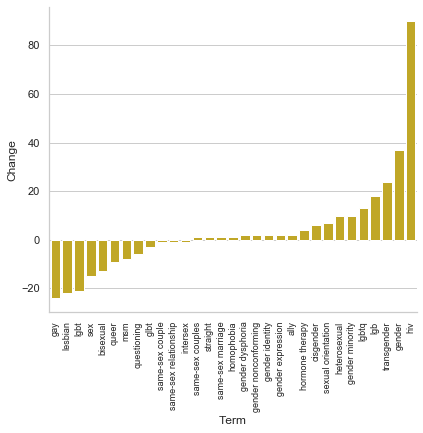

In [7]:
a.plot_bars(abs_changes, 'term', 'change')

*Relative changes*

To contextualize the observed relative changes, it must be noted that no term represents more than 0.65% of all words across the analyzed websites. Therefore, small absolute increases result in large relative increases. The five terms that most increased their relative presence were “cisgender”, “hormone therapy”, “gender minority”, “ally” and “LGB”. The five terms that saw the biggest decrease in their relative presence were “same-sex couple”, “same-sex relationship”, “queer”, “MSM” and “questioning”. None of the terms with a top 5 increase in absolute terms saw a top 5 increase in relative terms.


Note. The term cisgender did not appear before, hence the change is infinity

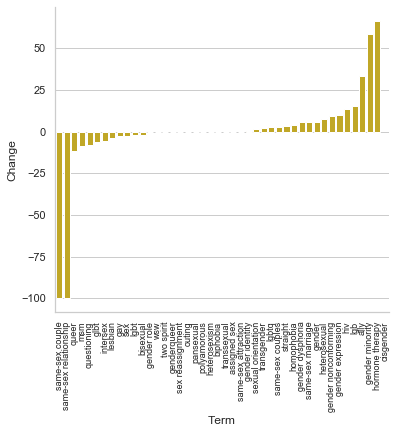

In [8]:
a.plot_bars(rel_changes, 'term', 'change')

*Changes by Department*

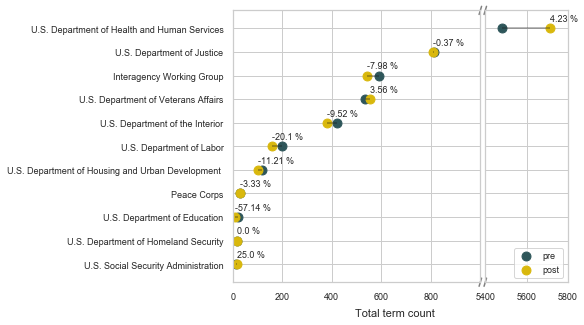

In [15]:
df = a.plot_dpt_changes(df_pre_merged, df_post_merged, col_names, control_terms)

*Absolute Changes in Terms by Department*

Plots of the absolute changes by department with most changes.

In [16]:
department_list = ['U.S. Department of Health and Human Services',
                   'U.S. Department of the Interior',
                   'U.S. Department of Labor',
                   'U.S. Department of Housing and Urban Development ',
                   'U.S. Department of Education',
                   'Interagency Working Group',
                   'U.S. Department of Veterans Affairs',
                   'U.S. Department of Justice',
                   'Peace Corps',
                   'U.S. Social Security Administration']
department_pos = ['U.S. Department of Health and Human Services', 
                  'U.S. Department of the Interior', 
                  'U.S. Department of Labor']
department_neg = ['U.S. Department of Justice',
                  'Interagency Working Group',
                  'U.S. Department of the Interior',
                  'U.S. Department of Labor',
                  'U.S. Department of Housing and Urban Development ',
                  'U.S. Department of Education']

number of rows 2
U.S. Department of Health and Human Services
The absolute number of terms changed 4.37 %, from 5608 to 5853
U.S. Department of the Interior
The absolute number of terms changed -9.50 %, from 421 to 381
U.S. Department of Labor
The absolute number of terms changed -20.30 %, from 202 to 161


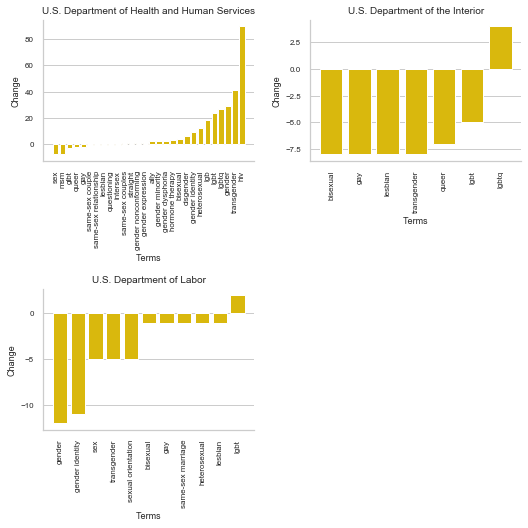

In [23]:
a.plot_changes_dept(df_pre_merged, df_post_merged, col_names, department_pos)

number of rows 3
U.S. Department of Justice
The absolute number of terms changed -0.36 %, from 825 to 822
Interagency Working Group
The absolute number of terms changed -7.86 %, from 598 to 551
U.S. Department of the Interior
The absolute number of terms changed -9.50 %, from 421 to 381
U.S. Department of Labor
The absolute number of terms changed -20.30 %, from 202 to 161
U.S. Department of Housing and Urban Development 
The absolute number of terms changed -11.21 %, from 116 to 103
U.S. Department of Education
The absolute number of terms changed -57.14 %, from 21 to 9


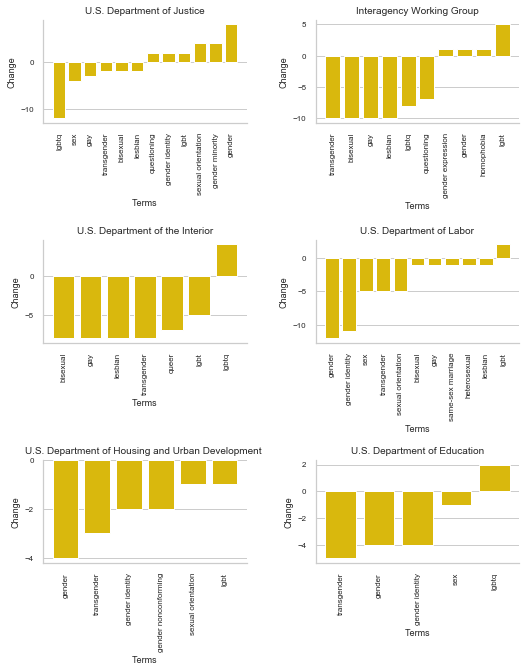

In [24]:
a.plot_changes_dept(df_pre_merged, df_post_merged, col_names, department_neg)

<a id='section_3'></a>
## 3. Tone Analysis

In this section I perform an analysis on how the tone of the content across websites has changed over time. To do so, I use the [pysentiment](https://github.com/hanzhichao2000/pysentiment) package, which uses the [Harvard IV-4](http://www.wjh.harvard.edu/~inquirer/homecat.htm) sentiment dictionary for general content analysis. The Harvard IV-4 dictionary provides a better suited alternative than other more widely used dictionaries that are tailored for social-media sentiment analysis. I use the default library's tokenizer, which converts alphabetic text to lowercase, stems it using nltk.PorterStemmer and excludes words in [predefined stoplists](https://github.com/hanzhichao2000/pysentiment/tree/master/pysentiment/static) (currencies, dates and numbers, geographic, names and other generic words). Then, I calculate the polarity and subjectivity scores of each website at both points in time (ie. pre and post) as:

* polarity(website) = (&Sigma; positive tokens - &Sigma; negative tokens) / (&Sigma; positive tokens + &Sigma; negative tokens)
 
* subjectivity(website) = (&Sigma; positive tokens - &Sigma; negative tokens) / (&Sigma; all tokens)

For the purpose of this analysis, subjectivity is more important, as I'm trying to detect any signficant changes in the way that information is conveyed across Federal government websites. The interpretation of polarity is largely restricted to each website, as the definition of what consitutes positive or negative language is not clearly captured by the dictionary that I'm using.

In [25]:
data_pre = ta.get_tone(df_pre_merged)
ta_df_pre = pd.DataFrame.from_dict(data_pre)
ta_df_pre.polarity.mean(), ta_df_pre.subjectivity.mean()
#ta_df_pre.sort_values(by='subjectivity', ascending=False)

(0.4792497881613576, 0.2851123444981216)

In [26]:
data_post = ta.get_tone(df_post_merged)
ta_df_post = pd.DataFrame.from_dict(data_post)
ta_df_post.polarity.mean(), ta_df_post.subjectivity.mean()
#ta_df_post.sort_values(by='subjectivity', ascending=False)

(0.48474776772272904, 0.29204616098675057)

With a p-value of 1.0185000412499257e-11, we reject the null hypothesis that the data was drawn from a normal distribution


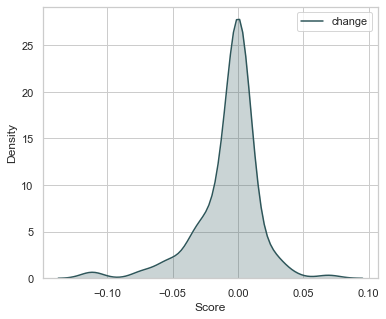

In [28]:
normality_subj = a.plot_normal(ta_df_pre, ta_df_post, 'subjectivity')

With a p-value of 2.1961794362257425e-13, we reject the null hypothesis that the data was drawn from a normal distribution


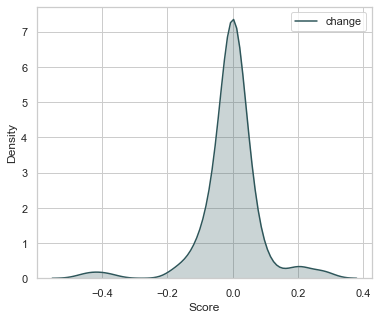

In [29]:
normality_pol = a.plot_normal(ta_df_pre, ta_df_post, 'polarity')

Since the pre post differences in polarity and subjectivity do not seem to be normally distributed (ie. they are skewed), we use the Wilcoxon test to test for the signficance of the results at the 10% level.

In [30]:
significance = 5
a.test_significance(ta_df_pre, ta_df_post, 'subjectivity', significance, normality_subj)
a.test_significance(ta_df_pre, ta_df_post, 'polarity', significance, normality_pol)

The change in subjectivity is statistically significant at the 5 %
The change in polarity is not statistically significant at the 5 %


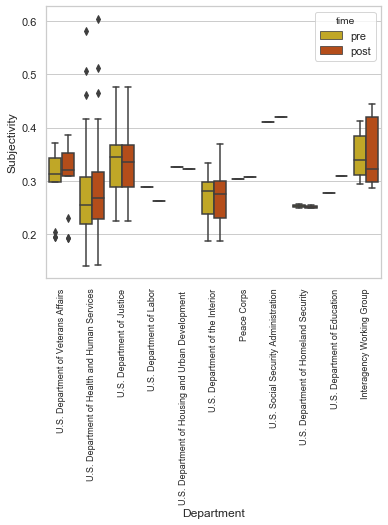

In [31]:
df = a.plot_boxplot(ta_df_pre, ta_df_post)

<a id='section_4'></a>
## 4. Department Case Analysis: HUD

We got all the available links from hud.gov, hudexchange.info and huduser

In [44]:
driver_path = os.getcwd() + '/scripts/chromedriver'

hud.gov

In [45]:
wayback_url = 'https://web.archive.org/web/*/www.hud.gov/*'
browser = gc.open_chrome(wayback_url, driver_path)

In [428]:
# wait to run this until wayback website is fully rendered
hud = gc.get_urls(browser, 'Jan 20, 2013', 'Jan 19, 2017', "hud/hud_links.csv")

hudexchange.info

In [430]:
wayback_url = 'https://web.archive.org/web/*/www.hudexchange.info/*'
browser = gc.open_chrome(wayback_url, driver_path)

In [432]:
# wait to run this until wayback website is fully rendered
hud_exchange = gc.get_urls(browser, 'Jan 20, 2013', 'Jan 19, 2017', "hud/hud_exchange_links.csv")

In [437]:
# remove wayback prefix from links and save links
stored_copy = hud[:] + hud_exchange[:]
len('https://web.archive.org/web/*/')
for row in stored_copy:
    row[0] = row[0][30:]
not_accepted = ['.gif', '.pdf', '.jpg', '.png', 'lang=es', '.ppt', '.doc',
               '.rtf', 'calendar/event']
hud_links = [link[0] for link in stored_copy if not any (element in link for element in not_accepted)]
with open('inputs/links_hud.csv', 'w') as f:
    writer = csv.writer(f)
    for line in hud_links:
        writer.writerow([line])

In [438]:
terms = one_word_terms + two_word_terms
control_terms = ['heterosexual', 'straight']
dates_pre = [2013, 1, 20, 2017, 1, 19]
dates_post = [2017, 1, 20, 2019, 8, 22]
output_name = 'counts_hud'
gc.get_output('inputs/links_hud.csv', output_name, terms, dates_pre, dates_post, store_text=True)

In [36]:
multi_word_terms = two_word_terms[:]
output_name = 'counts_hud'
df_pre_merged, df_post_merged, col_names = a.get_final_df(department_path, multi_word_terms, one_word_terms, output_name)
inconsistencies = [23, 90, 146, 273]
df_pre_merged = df_pre_merged[~df_pre_merged.id.isin(inconsistencies)]
df_post_merged = df_post_merged[~df_post_merged.id.isin(inconsistencies)]
rel_changes, rel_pre, rel_post = a.get_changes(df_pre_merged, df_post_merged, 'id', col_names, 'ttal', pctg=True)
abs_changes = a.get_changes(df_pre_merged, df_post_merged, 'id', col_names, 'ttal', pctg=False)
# uncomment to check relative frequencies
#rel_pre.sort_values()
#rel_post.sort_values()

The relative number of terms changed -15.49 %, from 0.001 to 0.001
The absolute number of terms changed -4.44 %, from 428 to 409


In [37]:
a.display_side_by_side(rel_changes, abs_changes)

,term,change
0,gender nonconforming,-46.94
1,transgender,-19.79
2,gender identity,-18.93
3,gender,-17.56
4,sex,-17.09
5,lgbt,-16.62
6,hiv,-14.59
7,sexual orientation,-14.41
8,lesbian,-11.56
9,questioning,-11.56


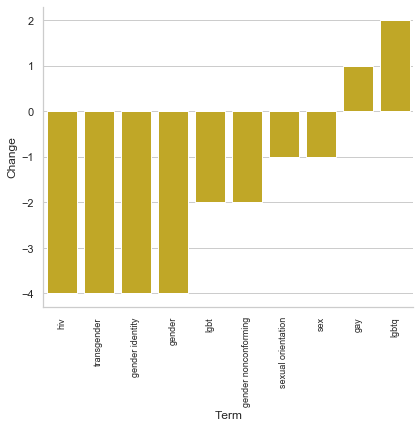

In [42]:
a.plot_bars(abs_changes, 'term', 'change')

In [43]:
pwd

'/Users/sunlightfellow/Google Drive/lgbtq_trends/src'

Some sanity checking functions to check for any potential text discrepancies

Note. Avoid using iterrows!

In [39]:
for index, row in df_post_merged.iterrows():
    try:
        if len(row.text) < 5:
            print(row.id, row.url)
            print(row.text)
            print('*******')
    except Exception as e:
        print(e)

object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'float' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' ha

object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'float' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' ha

In [40]:
for index, row in df_pre_merged.iterrows():
    try:
        if len(row.text) < 5:
            print(row.id, row.url)
            print(row.text)
            print('*******')
    except Exception as e:
        print(e)

67 http://web.archive.org/web/20131029141556id_/http://www.hud.gov/?adid=www.nubianlink.net
['We recently moved this document. This page should refresh momentarily.', 'If, after a few seconds, the page does not change, follow this link to', 'go to the new page', '.']
*******
68 http://web.archive.org/web/20160329033854id_/http://www.hud.gov/?external-link
['We recently moved this document. This page should refresh momentarily.', 'If, after a few seconds, the page does not change, follow this link to', 'go to the new page', '.']
*******
69 http://web.archive.org/web/20160502200248id_/http://www.hud.gov/?keepThis=true&TB_iframe=true&height=650&width=850
['We recently moved this document. This page should refresh momentarily.', 'If, after a few seconds, the page does not change, follow this link to', 'go to the new page', '.']
*******
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()


3156 http://web.archive.org/web/20151009010009id_/https://www.hudexchange.info/resource/3655/cdbg-memorandum-using-funds-for-the-construction-of-railroad-crossing/
['502 Bad Gateway', 'nginx/1.15.8']
*******
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'float' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 'NoneType' has no len()
object of type 

In [41]:
df_pre_merged

,agender,ally,aromantic,asexual,biphobia,bisexual,cisgender,gay,gender,genderqueer,...,sex reassignment,sexual orientation,two spirit,id,ttal,dates,text,url,results,department
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,67,29.00,2013-10-29 14:15:56,[We recently moved this document. This page sh...,http://web.archive.org/web/20131029141556id_/h...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",U.S. Department of Health and Human Services
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,68,29.00,2016-03-29 03:38:54,[We recently moved this document. This page sh...,http://web.archive.org/web/20160329033854id_/h...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",U.S. Department of Health and Human Services
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,69,29.00,2016-05-02 20:02:48,[We recently moved this document. This page sh...,http://web.archive.org/web/20160502200248id_/h...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",U.S. Department of Health and Human Services
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,73,265.00,2015-04-26 02:01:17,"[HUD in Alabama, HUD Photo, April is Fair Hous...",http://web.archive.org/web/20150426020117id_/h...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",U.S. Department of Health and Human Services
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,533,nan,None,None,None,None,NaN
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,534,nan,None,None,None,None,NaN
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,535,nan,None,None,None,None,NaN
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,537,nan,None,None,None,None,NaN
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,538,nan,None,None,None,None,NaN
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,539,nan,None,None,None,None,NaN
